In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('F:/Titanic/data/train.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
del(df_train['PassengerId'])
del(df_train['Name'])

In [5]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Base Classifier:
In this approach we will use all of data to Naive Bayse Model (Simplest one) and see how much accurary we obtain we our simple settings

In [6]:
import h2o

In [7]:
h2o.init(max_mem_size='6G')

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.121-b13, mixed mode)
  Starting server from C:\Users\hamza\Anaconda3\envs\gl-env\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: c:\users\hamza\appdata\local\temp\tmp9k6x7w
  JVM stdout: c:\users\hamza\appdata\local\temp\tmp9k6x7w\h2o_hamza_started_from_python.out
  JVM stderr: c:\users\hamza\appdata\local\temp\tmp9k6x7w\h2o_hamza_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster version:,3.10.3.4
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_hamza_azs8js
H2O cluster total nodes:,1
H2O cluster free memory:,5.333 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [8]:
hdf = h2o.H2OFrame(df_train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
hdf['Survived']= hdf['Survived'].asfactor()
# del()

In [10]:
hdf_train, hdf_validate = hdf.split_frame([0.70], seed=100)

In [11]:
input_col = hdf.col_names
input_col.remove('Survived')
print input_col

[u'Pclass', u'Sex', u'Age', u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked']


In [12]:
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator

In [13]:
nb =H2ONaiveBayesEstimator(seed =1)
nb.train(x =input_col, y = 'Survived', training_frame=hdf_train, validation_frame=hdf_validate)

naivebayes Model Build progress: |████████████████████████████████████████| 100%


Train accuracy: 0.84609305924
valid accuracy: 0.818798449612


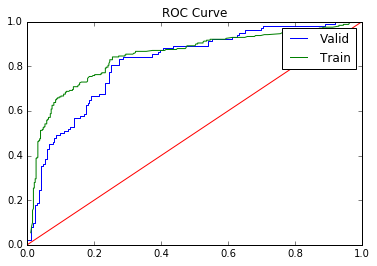

In [14]:
def model_performance(model =  nb):
    print 'Train accuracy:', model.auc(train=True)
    print 'valid accuracy:', model.auc(valid=True)

    roc_valid = model.roc(valid=True)
    roc_train= model.roc()

    plt.plot(roc_valid[0],roc_valid[1])
    plt.plot(roc_train[0],roc_train[1])
    plt.plot(np.arange(0.0,1.1,0.1),np.arange(0.0,1.1,0.1))
    
    plt.title('ROC Curve')
    plt.legend(['Valid','Train'])
    plt.show()

model_performance()

We will make naive bayse  model accuracy as base resut. Now will improve the model accuarcy by complexing model or feature engineering techniques

# Complex Models

In [15]:
# This model is less bais to overfitting
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [31]:
gbm_model = H2OGradientBoostingEstimator(seed =1,  ntrees = 1500, learn_rate = .0001, nbins =10, nfolds =10)
gbm_model.train(x =input_col, y = 'Survived', training_frame=hdf_train, validation_frame=hdf_validate)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


Train accuracy: 0.941219053935
valid accuracy: 0.768011855905


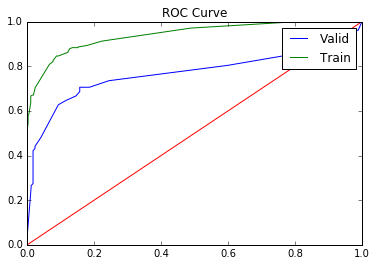

In [32]:
model_performance(gbm_model)

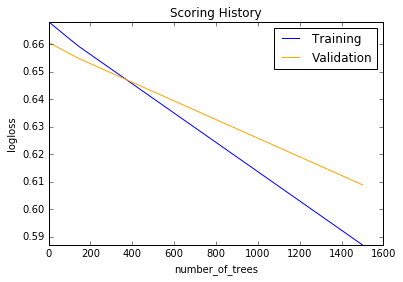

In [33]:
gbm_model.plot()

In [34]:
print gbm_model.logloss(train=True)
print gbm_model.logloss(valid=True)

0.587039884488
0.608934200667


# Prediction 

Now load test data and do same preprocessing as on training set and then do predictions

In [35]:
df_test = pd.read_csv('F:/Titanic/data/test.csv')

In [36]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
del(df_test['PassengerId'])
del(df_test['Name'])

In [38]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,male,27.0,0,0,315154,8.6625,NaN,S
4,3,female,22.0,1,1,3101298,12.2875,NaN,S


load data into h2o frame

In [39]:
hdf_test = h2o.H2OFrame(df_test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [40]:
def get_prediction(model= gbm_model, hdf_data = hdf_test, create_frame=True):
    prediction = model.predict(hdf_data)
    
    if(create_frame == True):
        lst_id=range(892,len(df_test['Age'])+892)

        #initialize dataframe and save prediction values in Survived columns and lst_id in Passenger id coloums
        df_submission = pd.DataFrame()
        df_submission['PassengerId'] = lst_id
        df_submission['Survived'] = prediction['predict'].as_data_frame()
        
        return df_submission

    else:
    #     prediction['predict'].unique()
        return prediction

In [41]:
# def create_frame()
# #     print len(df_test['Age'])
# #     print len(range(892,len(df_test['Age'])+892))

#     lst_id=range(892,len(df_test['Age'])+892)

#     #initialize dataframe and save prediction values in Survived columns and lst_id in Passenger id coloums
#     df_submission = pd.DataFrame()
#     df_submission['PassengerId'] = lst_id
#     df_submission['Survived'] = prediction['predict'].as_data_frame()
    
#     re

In [42]:
df_submission = get_prediction(gbm_model)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [43]:
df_submission.to_csv('F:/Titanic/data/submission.csv',index=False)